In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.5 MB/s eta 0:00:00


In [2]:
cd /content/drive/MyDrive/Colab_Notebooks/

/content/drive/MyDrive/Colab_Notebooks


In [13]:
# importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import csv
import shap
import xgboost


from sklearn.model_selection import train_test_split


#importing data set
df = pd.read_csv('Spatial_Navigation_Research_DATA_2012-2013(NO_NAMES)_62sketchmappers_complete.csv')
print(df)

X = df.drop("Sketchmap02", axis = 1)
y = df["Sketchmap02"]

# to show the variable name during plot graph
feat_list = X.columns.tolist()
print(feat_list)

    Sketchmap02  NSQ1  NSQ4  NSQ6  NSQ7  NSQ8  NSQ10  NSQ11  NSQ16  NSQ18  \
0             1     4     1     1     2     5      4      5      5      4   
1             3     3     3     1     4     4      4      4      3      2   
2             1     2     3     2     2     4      3      4      2      2   
3             1     1     3     1     3     3      2      2      3      1   
4             1     2     2     2     2     4      3      2      2      2   
..          ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
57            3     5     4     5     4     3      4      4      5      4   
58            2     4     3     4     4     4      4      4      4      4   
59            1     4     2     4     3     4      2      3      2      3   
60            3     4     4     3     3     2      4      4      4      3   
61            3     2     3     2     3     5      3      4      4      2   

    ...  NSQ60  NSQ61  NSQ62  NSQ64  NSQ66  NSQ68  NSQ70  NSQ71  NSQ72  NSQ

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [15]:
# using xgboost
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

In [20]:
# for train data
shap_values = shap.TreeExplainer(bst).shap_values(X_test)

type(shap_values)

[08:31:59] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


numpy.ndarray

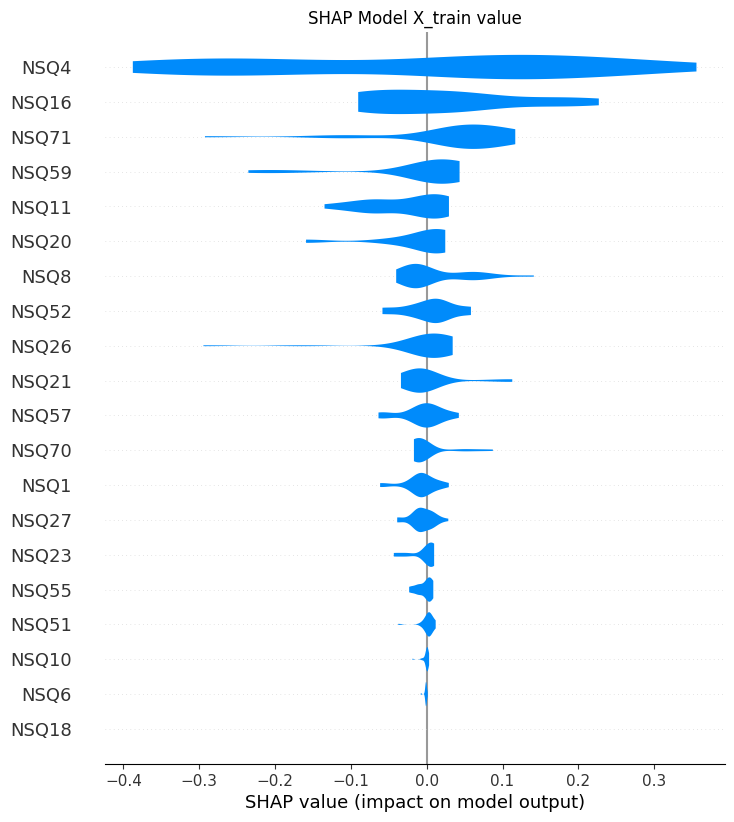

In [17]:
# show train result
plt.title("SHAP Model X_train value")
shap.plots.violin(shap_values, feature_names = feat_list)
plt.show()

In [18]:
# for test data
shap_values_train = shap.TreeExplainer(bst).shap_values(X_train)

type(shap_values_train)


[08:30:03] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


numpy.ndarray

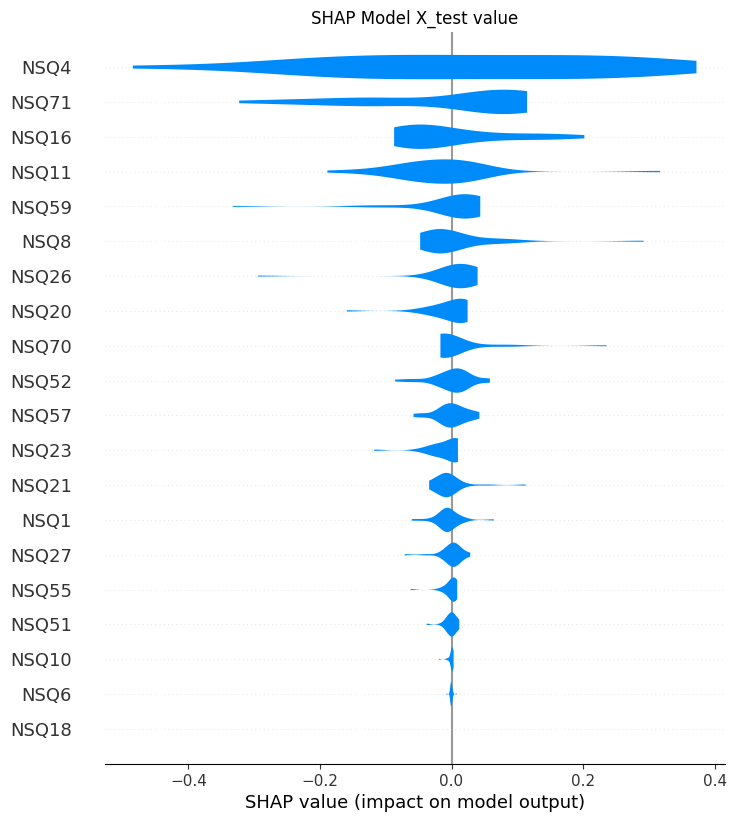

In [19]:
# show the test result
plt.title("SHAP Model X_test value")
shap.plots.violin(shap_values_train, feature_names = feat_list)
plt.show()